<a href="https://colab.research.google.com/github/priyanshu3042/Level3Task3/blob/main/Level3Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving Dataset .csv to Dataset .csv


/tmp/ipython-input-2-3294106995.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="viridis")


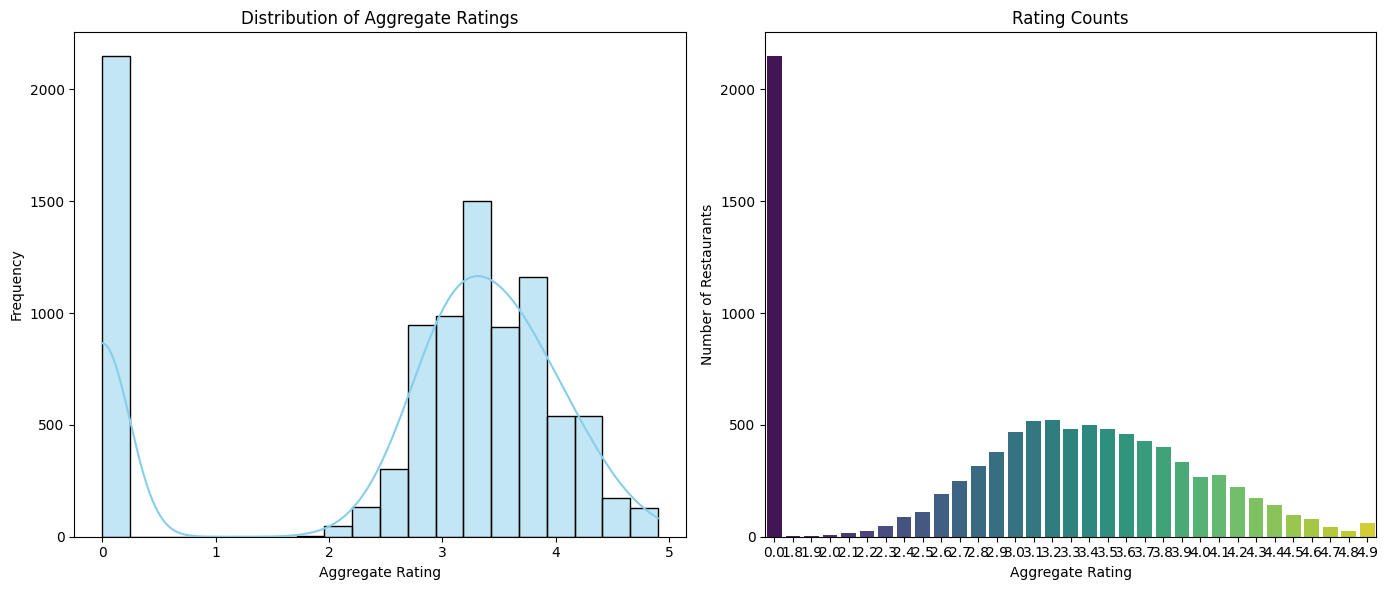

/tmp/ipython-input-2-3294106995.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_avg_rating.values, y=city_avg_rating.index, palette="mako")
/tmp/ipython-input-2-3294106995.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cuisine_avg_rating.values, y=cuisine_avg_rating.index, palette="rocket")


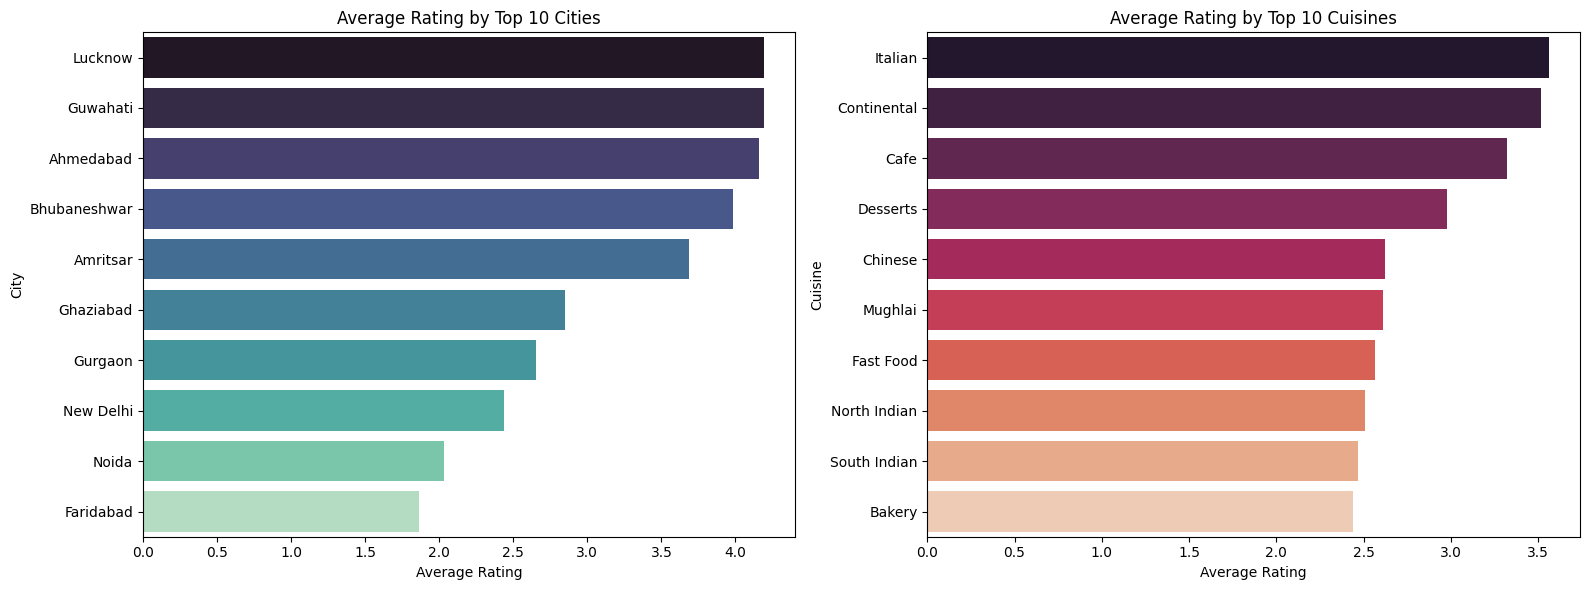

/tmp/ipython-input-2-3294106995.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Price range', y='Aggregate rating', data=df, palette='coolwarm')


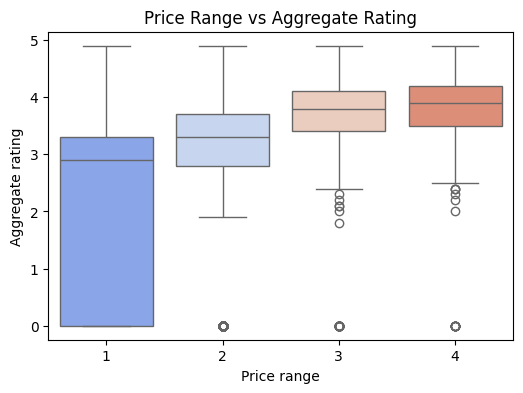

/tmp/ipython-input-2-3294106995.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Has Table booking', y='Aggregate rating', data=df, palette='Set2')


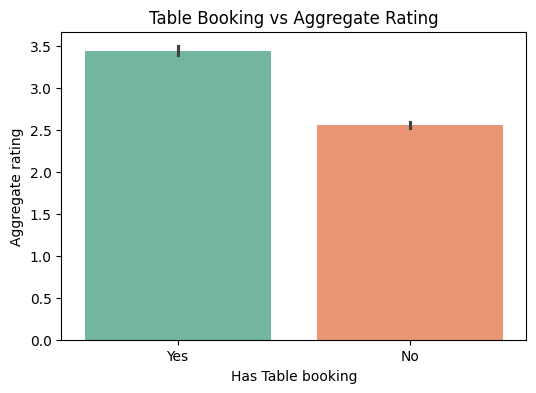

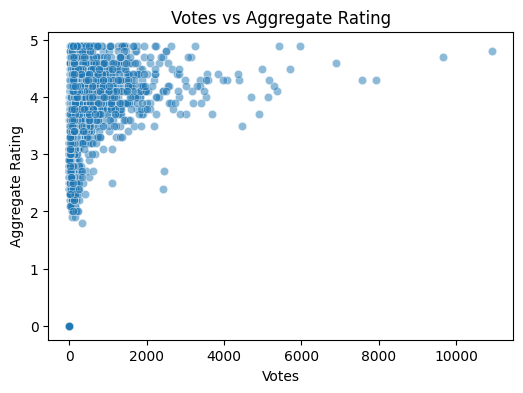

In [2]:
# Step 0: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load Dataset
df = pd.read_csv("Dataset .csv")  # Make sure the path matches your file

# Step 2: Distribution of Ratings
plt.figure(figsize=(14, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df["Aggregate rating"], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Aggregate Ratings")
plt.xlabel("Aggregate Rating")
plt.ylabel("Frequency")

# Bar Plot of Rating Counts
plt.subplot(1, 2, 2)
rating_counts = df["Aggregate rating"].value_counts().sort_index()
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="viridis")
plt.title("Rating Counts")
plt.xlabel("Aggregate Rating")
plt.ylabel("Number of Restaurants")

plt.tight_layout()
plt.show()

# Step 3: Compare Average Ratings - Cities & Cuisines

# Top 10 Cities by Restaurant Count
top_cities = df['City'].value_counts().head(10).index
city_avg_rating = df[df['City'].isin(top_cities)].groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)

# Top 10 Cuisines by Frequency
cuisine_series = df['Cuisines'].dropna().str.split(', ').explode()
top_cuisines = cuisine_series.value_counts().head(10).index
df_exploded = df.dropna(subset=['Cuisines']).copy()
df_exploded['Cuisine'] = df_exploded['Cuisines'].str.split(', ')
df_exploded = df_exploded.explode('Cuisine')
cuisine_avg_rating = df_exploded[df_exploded['Cuisine'].isin(top_cuisines)].groupby('Cuisine')['Aggregate rating'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(16, 6))

# City Ratings
plt.subplot(1, 2, 1)
sns.barplot(x=city_avg_rating.values, y=city_avg_rating.index, palette="mako")
plt.title("Average Rating by Top 10 Cities")
plt.xlabel("Average Rating")
plt.ylabel("City")

# Cuisine Ratings
plt.subplot(1, 2, 2)
sns.barplot(x=cuisine_avg_rating.values, y=cuisine_avg_rating.index, palette="rocket")
plt.title("Average Rating by Top 10 Cuisines")
plt.xlabel("Average Rating")
plt.ylabel("Cuisine")

plt.tight_layout()
plt.show()

# Step 4: Feature Relationships with Rating

# Price Range vs Rating
plt.figure(figsize=(6, 4))
sns.boxplot(x='Price range', y='Aggregate rating', data=df, palette='coolwarm')
plt.title("Price Range vs Aggregate Rating")
plt.show()

# Table Booking vs Rating
plt.figure(figsize=(6, 4))
sns.barplot(x='Has Table booking', y='Aggregate rating', data=df, palette='Set2')
plt.title("Table Booking vs Aggregate Rating")
plt.show()

# Votes vs Rating (Scatter)
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Votes', y='Aggregate rating', data=df, alpha=0.5)
plt.title("Votes vs Aggregate Rating")
plt.xlabel("Votes")
plt.ylabel("Aggregate Rating")
plt.show()
